### Convolutional Neural Network Cifar dataset

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import keras

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.cifar10.load_data()
X_train.shape ,X_test.shape ,y_train.shape ,y_test.shape 

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [4]:
y_train.reshape(-1,)

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

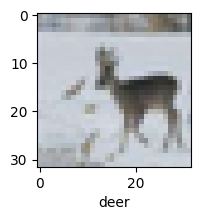

In [6]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
def ShowImage(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

ShowImage(X_train,y_train,20)

In [7]:
X_train[0][0][0:5]  # So we should scale the data

array([[59, 62, 63],
       [43, 46, 45],
       [50, 48, 43],
       [68, 54, 42],
       [98, 73, 52]], dtype=uint8)

In [8]:
X_train = X_train/255
X_test = X_test/255

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=10)

2024-01-05 16:46:37.600281: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10


2024-01-05 16:46:40.031200: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f510476d0e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-05 16:46:40.031280: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 Ti, Compute Capability 7.5
I0000 00:00:1704453400.402335    3332 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 [==============================] - 20s 12ms/step - loss: 1.8124 - accuracy: 0.3521
Epoch 2/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.6246 - accuracy: 0.4274
Epoch 3/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5412 - accuracy: 0.4534
Epoch 4/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4820 - accuracy: 0.4782
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4336 - accuracy: 0.4935
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3908 - accuracy: 0.5102
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.3525 - accuracy: 0.5255
Epoch 8/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.3198 - accuracy: 0.5355
Epoch 9/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.2839 - accuracy: 0.5505
Epoch 10/10
1563/1563 [==============================] - 23s 14ms/step - lo

In [15]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.5226 - accuracy: 0.4564


[1.5225658416748047, 0.4564000070095062]

Not bad but with convolutional NN it can be done better

In [9]:
cnn = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

2024-01-05 16:55:58.938722: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-05 16:55:59.236882: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-05 16:55:59.237112: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-05 16:55:59.240285: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-05 16:55:59.240483: I external/local_xla/xla/stream_executor

In [10]:
cnn.fit(X_train,y_train,epochs=10)

2024-01-05 16:56:05.077535: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
2024-01-05 16:56:05.693980: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10


2024-01-05 16:56:07.911257: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-01-05 16:56:09.920165: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f24e078d7c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-05 16:56:09.920244: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 Ti, Compute Capability 7.5
2024-01-05 16:56:09.955797: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1704453970.207082     772 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 [==============================] - 27s 13ms/step - loss: 1.4317 - accuracy: 0.4865
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0873 - accuracy: 0.6195
Epoch 3/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.9597 - accuracy: 0.6649
Epoch 4/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.8751 - accuracy: 0.6955
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8053 - accuracy: 0.7197
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7392 - accuracy: 0.7425
Epoch 7/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.6835 - accuracy: 0.7620
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6370 - accuracy: 0.7773
Epoch 9/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5950 - accuracy: 0.7910
Epoch 10/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.5

In [11]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9328 - accuracy: 0.7000


[0.9327989220619202, 0.699999988079071]